### **Evaluación de Distribuciones de Probabilidad**


In [ ]:
pip install fitter

In [15]:
#Importación de librerias
import pandas as pd
from fitter import Fitter, get_common_distributions, get_common_distributions
import seaborn as sns
import math
import matplotlib.pyplot as plt

In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving modelobloques.csv to modelobloques.csv
User uploaded file "modelobloques.csv" with length 15661643 bytes


In [5]:
dataframe = pd.read_csv('modelobloques.csv',sep =';')

In [6]:
dataframe

,x,y,z,dim_x,dim_y,dim_z,volumen,zone,cut,au,mo,densidad
0,46946,19956,3575,4,4,4,64,3,0.24,0.28,11.20,2.8
1,46938,19960,3575,4,4,4,64,3,0.15,0.01,7.15,2.8
2,46942,19960,3575,4,4,4,64,3,0.50,0.59,33.09,2.8
3,46946,19960,3575,4,4,4,64,3,0.18,0.21,8.71,2.8
4,46934,19964,3575,4,4,4,64,3,0.23,0.01,10.58,2.8
...,...,...,...,...,...,...,...,...,...,...,...,...
323797,47290,20672,3203,4,4,4,64,3,0.04,0.03,0.93,2.8
323798,47274,20676,3203,4,4,4,64,3,0.10,0.10,5.91,2.8
323799,47278,20676,3203,4,4,4,64,3,0.26,0.27,7.15,2.8
323800,47282,20676,3203,4,4,4,64,3,0.22,0.21,5.29,2.8


In [10]:
print(math.sqrt(dataframe['cut'].count()))

569.0360269789603


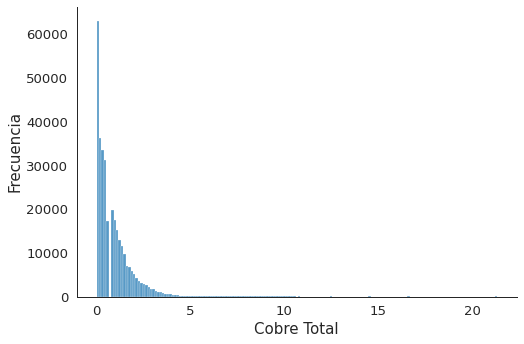

In [16]:
#Generación de histograma
sns.set_style('white')
sns.set_context('paper', font_scale = 1.5)

sns.displot(data = dataframe, x = 'cut', kind = 'hist', bins = 165, aspect = 1.5)
plt.xlabel('Cobre Total', fontsize = 15)
plt.ylabel('Frecuencia', fontsize = 15)

plt.show()

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.34 µs


,sumsquare_error,aic,bic,kl_div
gamma,0.082612,2.110189e+03,-4.915757e+06,inf
lognorm,0.118592,1.244754e+03,-4.798693e+06,inf
beta,0.186476,2.343725e+03,-4.652122e+06,inf
norm,1.264336,1.617066e+04,-4.032391e+06,inf
burr,inf,inf,inf,inf


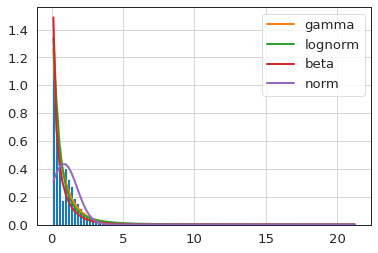

In [18]:
%time

f = Fitter(dataframe['cut'], distributions = ['gamma','lognorm','beta','burr','norm'])
f.fit()
f.summary()

In [19]:
from scipy import stats
data = stats.gamma.rvs(2, loc=1.5, scale=2, size=10000)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 4.77 µs


,sumsquare_error,aic,bic,kl_div
geninvgauss,0.001349,941.410492,-158153.146345,inf
pearson3,0.001349,939.401039,-158161.932015,inf
gamma,0.001349,939.408156,-158161.918873,inf
chi2,0.001349,939.403740,-158161.829566,inf
ncx2,0.001349,941.406006,-158152.410705,inf


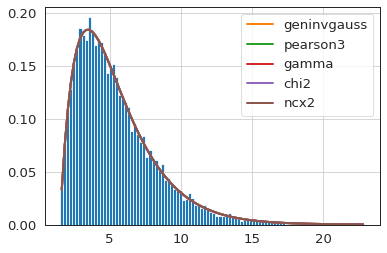

In [21]:
%time

from fitter import Fitter
f = Fitter(data)
f.fit()
# puede llevar algún tiempo ya que, de forma predeterminada, se prueban todas las distribuciones
# pero llama manualmente a proporcionar un conjunto más pequeño de distribución
f.summary()

,sumsquare_error,aic,bic,kl_div
foldnorm,0.871496,538.137029,-460.455961,inf
halfgennorm,0.871609,538.098462,-460.442990,inf
skewnorm,0.871697,540.628857,-460.432847,inf
halfnorm,0.871697,538.629371,-465.038000,inf
genhalflogistic,0.872130,537.902355,-460.383219,inf


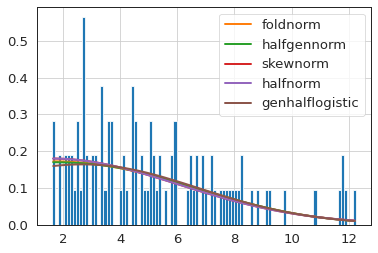

In [22]:
%time

data2 = stats.gamma.rvs(2, loc=1.5, scale=2, size=100)
f2 = Fitter(data2)
f2.fit()
f2.summary()

,sumsquare_error,aic,bic,kl_div
burr,0.882474,558.611217,-454.598984,inf
gamma,0.882731,550.954271,-459.174995,inf
beta,0.887439,524.959186,-454.037900,inf
lognorm,0.909213,559.883169,-456.219142,inf
norm,1.015956,561.609426,-449.723711,inf


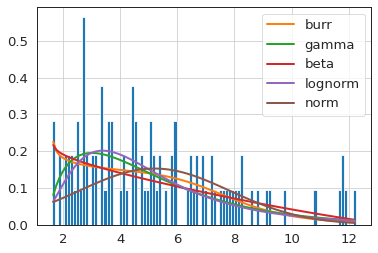

In [23]:
f2 = Fitter(data2, distributions = ['gamma','lognorm','beta','burr','norm'])
f2.fit()
f2.summary()